# Random sampling in Python
This notebook tests the performance of four methods of sampling from random distributions in Python.

## Introduction
We will compare the performance of four different methods for generating random samples. The goal is to identify the most efficient method for large-scale sampling tasks.

In [5]:
import matplotlib.pyplot as plt

from profiler import run_profiling, measure_memory_usage, time_sampling_method, time_setup
from weighted_random_sampling import AliasRandomGen, CDFRandomGen, ExponentialRandomGen, LookupRandomGen

## Setting up data
Here, we define the random numbers and their associated probabilities for sampling.

In [6]:
random_nums = [1, 2, 3]
probabilities = [0.3, 0.3, 0.4]

random_nums = [i for i in range(10000)]
probabilities = [1/10000] * 10000

# Drawing from distribution
We can call the ```next_num()``` method to draw a sample from the distribution using our implementation of choice.

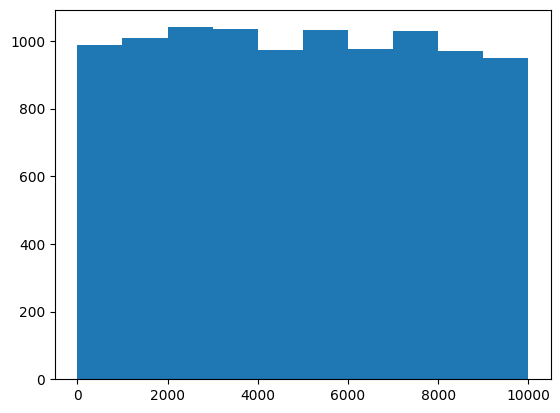

In [14]:
random = AliasRandomGen(random_nums, probabilities)
# random = ExponentialRandomGen(random_nums, probabilities)
# random = CDFRandomGen(random_nums, probabilities)
# random = LookupRandomGen(random_nums, probabilities)

results = [random.next_num() for _ in range(10000)]
plt.hist(results)
plt.show()

## Profiling Performance
We run profiling to measure the performance of the sampling methods. The exponential method results are left out as the sampling for large n takes too long, but the setup time and memory usage are low.

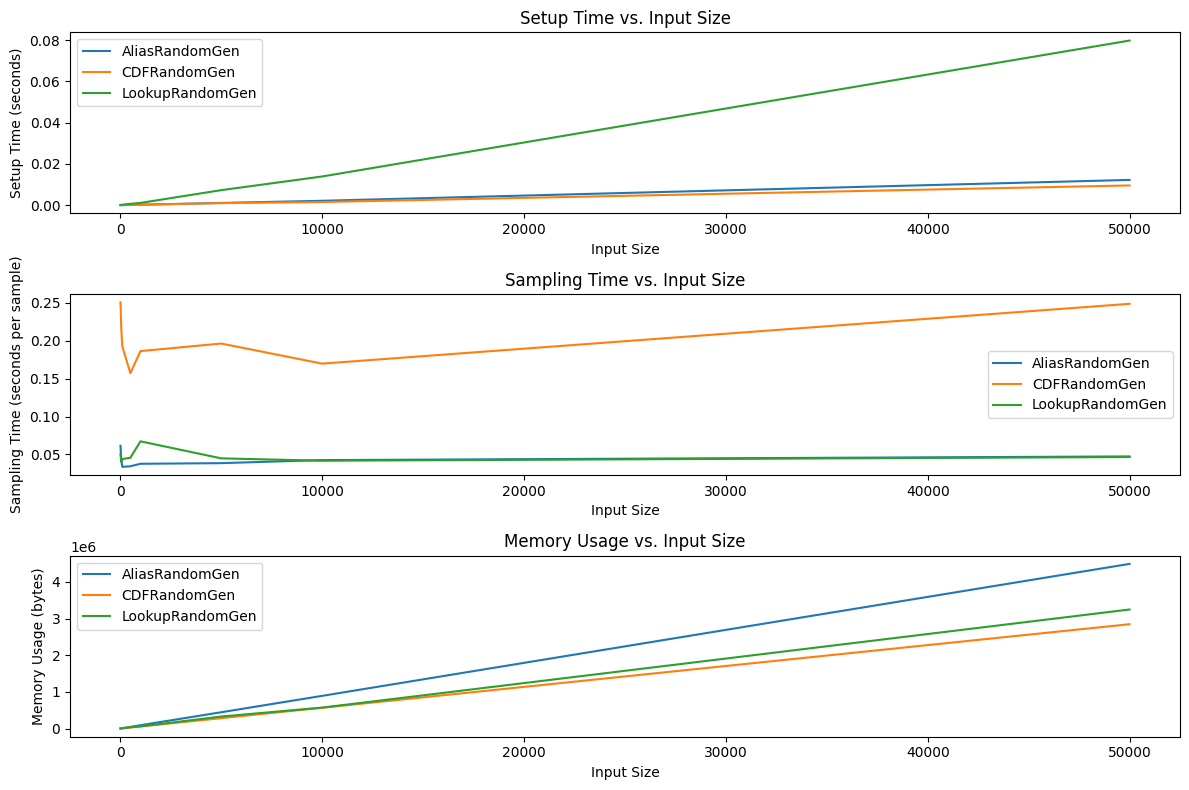

<Figure size 640x480 with 0 Axes>

In [9]:
run_profiling()

## Conclusion
This notebook demonstrates the performance of different random sampling methods. The results show that for 
1. **Setup Time**: the Exponential method is fastest with O(1) time, Alias and CDF approaches are tied second-fastest with expected O(N) time, and the Lookup method is slowest with O(K*N) time.
2. **Sampling Time**: the Lookup and Alias approaches are tied first with O(1), the CDF is O(logN), and the Exponential method is the slowest with O(N) *at least*.
3. **Memory Usage**: all the methods are O(N), but the Exponential method is the least intensive, followed by the CDF and Lookup, while Alias requires the most memory.

For higher values of K (larger sampling pool), or very precise probabilities, the Lookup method will become unmanageable due to enormous storage requirements, and will need to become approximate.

This means that for the different use cases:
1. **Frequent sampling, infrequent setup**: either Lookup or Alias 
2. **Infrequent sampling, frequent setup**: Exponential (if memory is an issue), Alias or CDF if not
3. **Frequent sampling, frequent setup**: CDF (if memory is an issue), Alias or Lookup if not
4. **Infrequent sampling, infrequent setup**: on balance, Alias or CDF.